In [1]:
import numpy as np
from matplotlib import animation
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pandas as pd
from IPython.display import HTML
from qwanta import Experiment
import matplotlib
import seaborn as sns

In [12]:
## Architype 2

def time_to_coordinate(t):
    return (50*np.sin((7/50)*t) + 100,0,0) #(90 + 7*t,0,0)

def time_to_coordinate_inv(t):
    return (-1*50*np.sin((7/50)*t) + 100,0,0)

def distance_to_prob(distance, time):
    p = [1, 0, 0, 0]
    return p

def adjusted_rate(rl, dl, ds, loss=0.1):
    return rl*10**((dl - ds)*loss/10)

minimal_edges_infos = [(0.0001, 175, 25), (0.0001, 125, 75), (0.0001, 100, 100)]
adjusted_rate_list = [adjusted_rate(*i) for i in minimal_edges_infos]

node_number = 3
n_hops = [2]
nodes_name = [f'Node {i}' for i in range(node_number)]
distance_btw = 100 # km
#nodes_coordinate = [(0, 0), (1000, 0), (2200, 0), (3600, 0), (5200, 0)]
edges_loss = [0.1]*(node_number-1) # dB/km

nodes_info_exp = [{
            'Node 0': {'coordinate': (0, 0, 0)},
            'Node 1': {'coordinate': (25, 0, 0)},
            'Node 2': {'coordinate': (200, 0, 0)},
            'numPhysicalBuffer': 20,
            'numInternalEncodingBuffer': 20,
            'numInternalDetectingBuffer': 10,
            'numInternalInterfaceBuffer': 2,
        },
        {  
            'Node 0': {'coordinate': (0, 0, 0)},
            'Node 1': {'coordinate': (75, 0, 0)},
            'Node 2': {'coordinate': (200, 0, 0)},
            'numPhysicalBuffer': 20,
            'numInternalEncodingBuffer': 20,
            'numInternalDetectingBuffer': 10,
            'numInternalInterfaceBuffer': 2,
        },
]

bias_edge = [{
        ('Node 0', 'Node 1'): {
        'connection-type': 'Space',
        'function': distance_to_prob,
        'loss': 0.1,
        'light speed': 300000,
        'Pulse rate': adjusted_rate(0.0001, 175, 25),
        },
        ('Node 1', 'Node 2'): {
        'connection-type': 'Space',
        'function': distance_to_prob,
        'loss': 0.1,
        'light speed': 300000,
        'Pulse rate': 0.0001,
        }
    },
    {
        ('Node 0', 'Node 1'): {
        'connection-type': 'Space',
        'function': distance_to_prob,
        'loss': 0.1,
        'light speed': 300000,
        'Pulse rate': adjusted_rate(0.0001, 125, 75),
        },
        ('Node 1', 'Node 2'): {
        'connection-type': 'Space',
        'function': distance_to_prob,
        'loss': 0.1,
        'light speed': 300000,
        'Pulse rate': 0.0001,
        }
    },
]

e_tl, vis_a = Experiment.read_timeline_from_csv(f'exper_ID9_2hops_1setup_ArcType2.xlsx', excel=True) # exper_id7_Logical_{i}hops.xlsx
#e_tl_2, vis_b = Experiment.read_timeline_from_csv(f'exper_ID9_2hops_2setup_ArcType2.xlsx', excel=True) # exper_id7_Logical_{i}hops.xlsx

timelines = {'BiasLeft-D25': e_tl, 'BiasLeft-D75': e_tl}
nodes_information = {'BiasLeft-D25': nodes_info_exp[0], 'BiasLeft-D75': nodes_info_exp[1]}
networks = {'BiasLeft-D25': bias_edge[0], 'BiasLeft-D75': bias_edge[1]}
mem_func = {'BiasLeft-D25': None, 'BiasLeft-D75': None}
sim_time = {'BiasLeft-D25': None, 'BiasLeft-D75': None}
labels ={'BiasLeft-D25': 'k', 'BiasLeft-D75': 'k'}
'''
name_exp = 'ID9-StaticBiasLeftLink-BiasRight-test'
timelines = {name_exp: e_tl}
nodes_information = {name_exp: nodes_info_exp[2]}
networks = {name_exp: bias_edge}
mem_func = {name_exp: None}
sim_time = {name_exp: None}
labels ={name_exp: 'k'}
'''
#e_tl[-1]['Num Trials'] = 9000
#e_tl_2[-1]['Num Trials'] = 9000
exp_names = ['BiasLeft-D25', 'BiasLeft-D75']

In [14]:
adjusted_rate_list

[0.0031622776601683794, 0.000316227766016838, 0.0001]

p = 2 # 
- Bias = Increase Resources to 100 per QNICs
- Bias IR = Increase Resources to 500 per QNICs pulse rate 0.0001 left/ 0.00001 right 
- Bias LR = Low Resources 20 per QNICs pulse rate 0.001 left/ 0.0001 right (10711.8s)

In [16]:
p = [2]
exper_architecture2bias = Experiment(networks, timelines, nodes_info=nodes_information, memFunc=mem_func, simTime=sim_time,
                 photon_channel=p, collect_fidelity_history=False, repeat=10,
                 label_records=labels,path='exp_ID9', message_log='exp_ID9_ArcType2_Adjusted', progress_bar=True)
exper_architecture2bias.run()

Experiments executed:   0%|          | 0/2 [00:00<?, ?it/s]

Parameters executed:   0%|          | 0/1 [00:00<?, ?it/s]

Parameters executed:   0%|          | 0/1 [00:00<?, ?it/s]

In [18]:
# AWTPQ = Average waiting time of each physical qubit encoded to logical qubit
col_name = {'AWTPQ ', 'Node', 'index', 'Experiment'}
experiemnt_results = exper_architecture2bias.results()
data_list = []
for exp_num, exp_name in enumerate(exp_names):
    for index in range(9000):
        all_mean_qubit_wt_left, all_mean_qubit_wt_right, time = [], [], []
        for repeat in range(10):
            qubits_left = experiemnt_results[exp_name][0][repeat]['Qubits waiting time'][index]['Node 0']
            qubits_right = experiemnt_results[exp_name][0][repeat]['Qubits waiting time'][index]['Node 2']

            mean_qubit_wt_left, mean_qubit_wt_right = np.mean(qubits_left), np.mean(qubits_right)
            all_mean_qubit_wt_left.append(mean_qubit_wt_left)
            all_mean_qubit_wt_right.append(mean_qubit_wt_right)
            time.append(experiemnt_results[exp_name][0][repeat]['Qubits waiting time'][index]['Time'])

        all_mean_time = np.mean(time)
        all_std_time = np.std(time)
        all_mean_left, all_mean_right = np.mean(all_mean_qubit_wt_left), np.mean(all_mean_qubit_wt_right)
        tmp_left = {'Experiment':exp_name, 'AWTPQ': all_mean_left, 'Node': 'Node 0', 'index':index, 'Time':all_mean_time, 'STD': all_std_time}
        tmp_right = {'Experiment':exp_name, 'AWTPQ': all_mean_right, 'Node': 'Node 2', 'index':index, 'Time':all_mean_time, 'STD': all_std_time}
        data_list.append(tmp_left)
        data_list.append(tmp_right)

dataset_architecture2 = pd.DataFrame(data_list)
dataset_architecture2

,Experiment,AWTPQ,Node,index,Time,STD
0,BiasLeft-D25,0.015522,Node 0,0,0.049277,0.012207
1,BiasLeft-D25,0.005797,Node 2,0,0.049277,0.012207
2,BiasLeft-D25,0.011427,Node 0,1,0.088189,0.011906
3,BiasLeft-D25,0.010339,Node 2,1,0.088189,0.011906
4,BiasLeft-D25,0.009996,Node 0,2,0.130714,0.016335
...,...,...,...,...,...,...
35995,BiasLeft-D75,0.010043,Node 2,8997,113.978182,0.380856
35996,BiasLeft-D75,0.004583,Node 0,8998,113.991081,0.379408
35997,BiasLeft-D75,0.010949,Node 2,8998,113.991081,0.379408
35998,BiasLeft-D75,0.005850,Node 0,8999,114.003339,0.378265


Text(0.5, 1.0, 'Archirecture Type: 2 Modified')

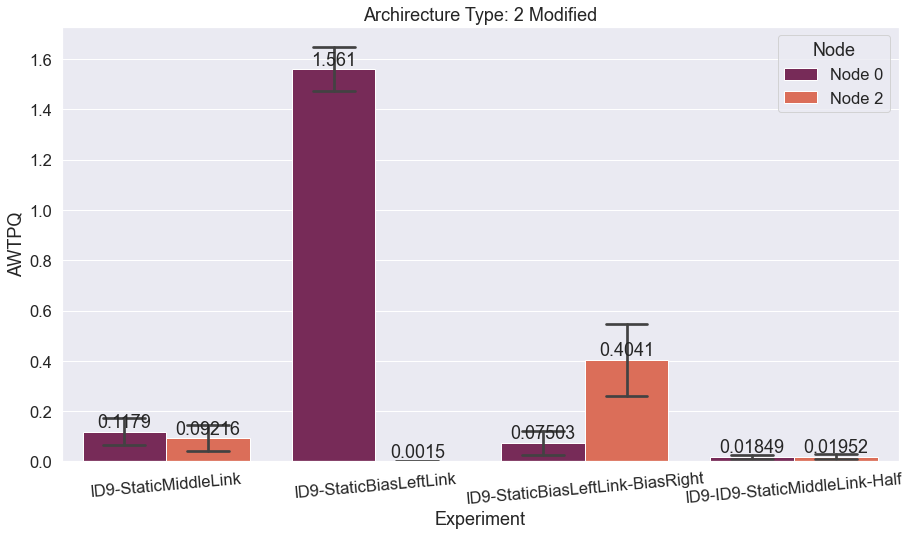

In [5]:
plt.figure(figsize = (15,8))
sns.set(font_scale = 1.5)
ax = sns.barplot(data=dataset_architecture2, x='Experiment', y='AWTPQ', hue='Node', ci='sd',palette="rocket" ,capsize=0.2)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.4}',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 5)
#ax.set_ylim(0, 0.005)
ax.set_title('Archirecture Type: 2 Modified')
#plt.savefig('exp_id9/exp_id9_architype2modified_loss_10repeated.png')

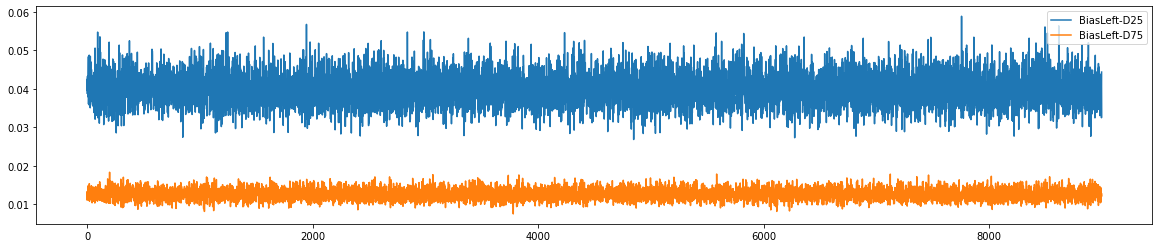

In [22]:
df = dataset_architecture2
plt.figure(figsize = (20,4))
for name in exp_names:
    time_diff_list = df.loc[(df['Experiment'] == name) & (df['Node'] == 'Node 0')]['Time'].diff()
    
    plt.plot(time_diff_list.to_list()[1:],label=name)
plt.legend()
#plt.savefig('exp_id9/exp_id9_architype2_time_diff_loss_10repeated.png')

In [8]:
df = dataset_architecture2
dummy = []
for name in exp_names:
    first_mean = df.loc[(df['Experiment'] == name) & (df['Node'] == 'Node 0')][['Time', 'STD']].head(1).iloc[0]['Time']
    first_std = df.loc[(df['Experiment'] == name) & (df['Node'] == 'Node 0')][['Time', 'STD']].head(1).iloc[0]['STD']
    last_mean = df.loc[(df['Experiment'] == name) & (df['Node'] == 'Node 0')][['Time', 'STD']].tail(1).iloc[0]['Time']
    last_std = df.loc[(df['Experiment'] == name) & (df['Node'] == 'Node 0')][['Time', 'STD']].tail(1).iloc[0]['STD']
    #print(f'{name}: first: {first_mean} STD: {first_std}, last: {last_mean} STD: {last_std}')
    dummy.append([first_mean, first_std, last_mean, last_std])
    #print(f'{first_mean}\t{first_std}\t{last_mean}\t{last_std}')
np.savetxt('exp_id9/exp_id9_a2_adjusted.csv', np.array(dummy), delimiter=",")

KeyError: "['STD'] not in index"

<AxesSubplot:xlabel='AWTPQ', ylabel='Count'>

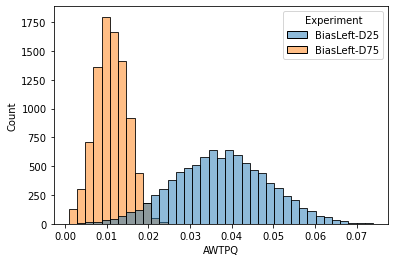

In [26]:
sns.histplot(data=df.loc[(df['Node'] == 'Node 0') & (df['Experiment'] != 'ID9-StaticBiasLeftLink')], x='AWTPQ', hue='Experiment')

<AxesSubplot:xlabel='AWTPQ', ylabel='Count'>

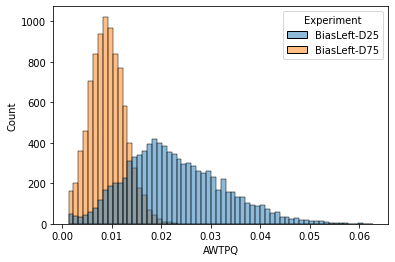

In [28]:
sns.histplot(data=df.loc[(df['Node'] == 'Node 2') & (df['Experiment'] != 'ID9-StaticBiasLeftLink')], x='AWTPQ', hue='Experiment')

In [24]:
arc = ['Architecture 2 (R-20 Adjusted)']*len(df)
df['Architecture'] = arc
df.to_csv('exp_id9/exp_id9_arch2_adjusted_results_df.csv')